Шипилова Полина, 303 группа, Физический Факультет МГУ
 
 # Решение одномерного уравнения переноса

#### Импортируем необходимые библиотеки

In [127]:
import numpy as np

import plotly
import plotly.graph_objs as go

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import warnings
from IPython.display import clear_output

## Постановка задачи

Используя схему бегущего счета и итерационные методы, решить задачу:

$$
\left\{\begin{aligned}
\frac{\partial u}{\partial t} + \frac{1}{1 + u^2} \frac{\partial u}{\partial x} = 0, \ ~ 0 < x \leq 1, \\
u(x,0) = x, \\
u(0,t) = 0.
\end{aligned}\\
\right. 
$$



## Исследование задачи

### Иследование характеристик

Общий вид квазилинейного уравнения переноса
$$
u_t+F(u)u_x = 0.
$$
Уравнение характеристик имеет вид
$$
~~dt = \frac{dx}{F(u(x,t))},\ \ \ u = const.
$$
В нашем случае
$$
~~dt=\left(1+u^2\right)dx.
$$

Преобразуем его

$$
\int_{t_o}^{t}dt=\int_{x_o}^{x}\left(1+u^2\right)dx,
\\
$$

$$
t=\left(1+u_0^2\right)(x-x_0)+t_0, u_0 = u(x_0, t_0).
\\
$$

Воспользуемся начальным и граничным условиями для получения двух семейств кривых:

1) $~~t_0=0: ~~~~~ t=\left(1+x_0^2\right)(x-x_0)$

2) $~~x_0=0: ~~~~~ t=x+t_0$

Позже построим проекции характеристик в заданных областях и проверим пересечения кривых. В точках пересечения проекций его характеристик решение будет разрывным. 

#### Уравнения характеристик

In [128]:
def f_t_0(x, x0):
    return (1+x0**2)*(x-x0)

def f_x_0(x, t0):
    return x + t0

#### Построение характеристик

<IPython.core.display.Javascript object>


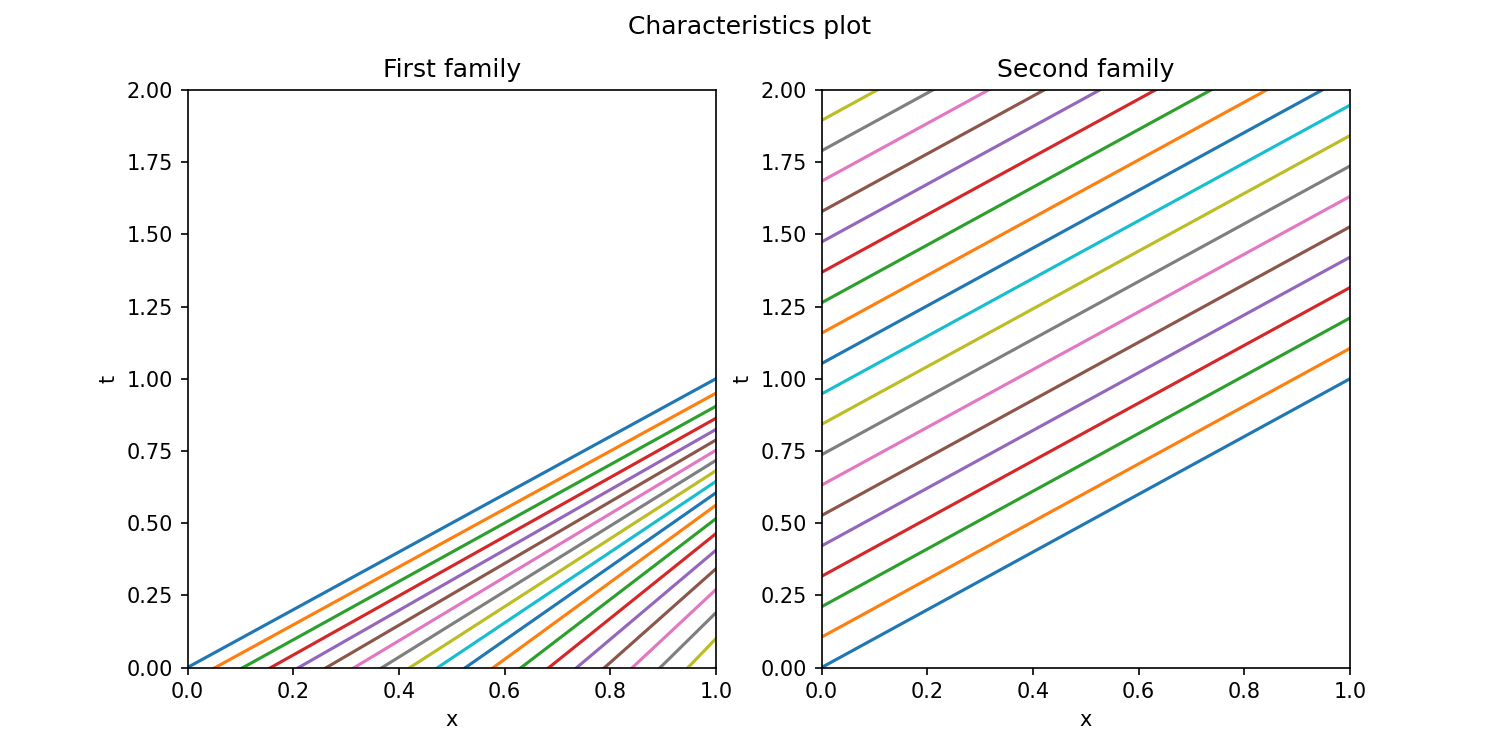

In [129]:
x_start = 0
x_end = 1
t_start = 0
t_end = 2
how_many = 20

x = np.linspace(x_start, x_end, 100)

gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0

fig.suptitle('Characteristics plot')
ax1.set_xlim(x_start, x_end)
ax1.set_ylim(t_start, t_end)
ax1.set_title('First family')
ax1.set_xlabel('x')
ax1.set_ylabel('t')

x_for_char = np.linspace(x_start, x_end, how_many)
t_for_char = np.linspace(t_start, t_end, how_many)

for x0 in x_for_char:
    ax1.plot(x, f_t_0(x, x0))
    
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('Second family')
ax2.set_xlim(x_start, x_end)
ax2.set_ylim(t_start, t_end)
ax2.set_xlabel('x')
ax2.set_ylabel('t')
for t0 in t_for_char:
    ax2.plot(x, f_x_0(x, t0))


Итак, в данной области $x\in(0, 1]$ характеристики не пересекаются, а значит не происходит явления опрокидывания волны и профиль является однозначным. Во всей области решение будет представимо через разностную схему.

## Численное решение

### Сетка

Введем в области $\Omega=\{(x,t):0\leq x<1,~0<t<2\}$ сетку с шагом $h$ по $x$ и шагом $\tau$ по $t$:


$$
\omega_{h, \tau}=\left\{\begin{array}{l}{x_{n}=n \cdot h,\ \  h=\frac{1}{N},\ \  n=\overline{0, N}} \\ {t_{m}=m \cdot \tau,\ \ \tau=\frac{1}{M},\ \ m=\overline{0, M}}\end{array}\right.
$$

Выберем $N = M = 100$.

На $\omega_{h, ~ \tau}$ будем рассматривать сеточную функцию $u^m_{n}=u(x_n,t_m)$.

### Шаблон

Приведём исходное уравнение к дивергентному виду $u_t + \left(\tilde{F}(x)\right)_x = 0$.

Так как $(\arctan x)' = \frac{1}{1+x^2}$, то уравнение преобразуется к виду

$$\frac{\partial u}{\partial t} + \frac{\partial}{\partial x}(\arctan u) = 0.$$

Соответственно, $F_n^m = F(u_n^m) = \arctan (u_n^m)$.

#### Схема "Верхний уголок"

Разностная схема в этом случе имеет вид

$$
\frac{1}{\tau}\left(u_{n+1}^{m+1} - u_{n+1}^{m}\right)+\frac{1}{h}\left(F\left(u_{n+1}^{m+1}\right) - F\left(u_{n+1}^{m}\right)\right) = 0
$$

Погрешность данной схемы $O(h + \tau)$.

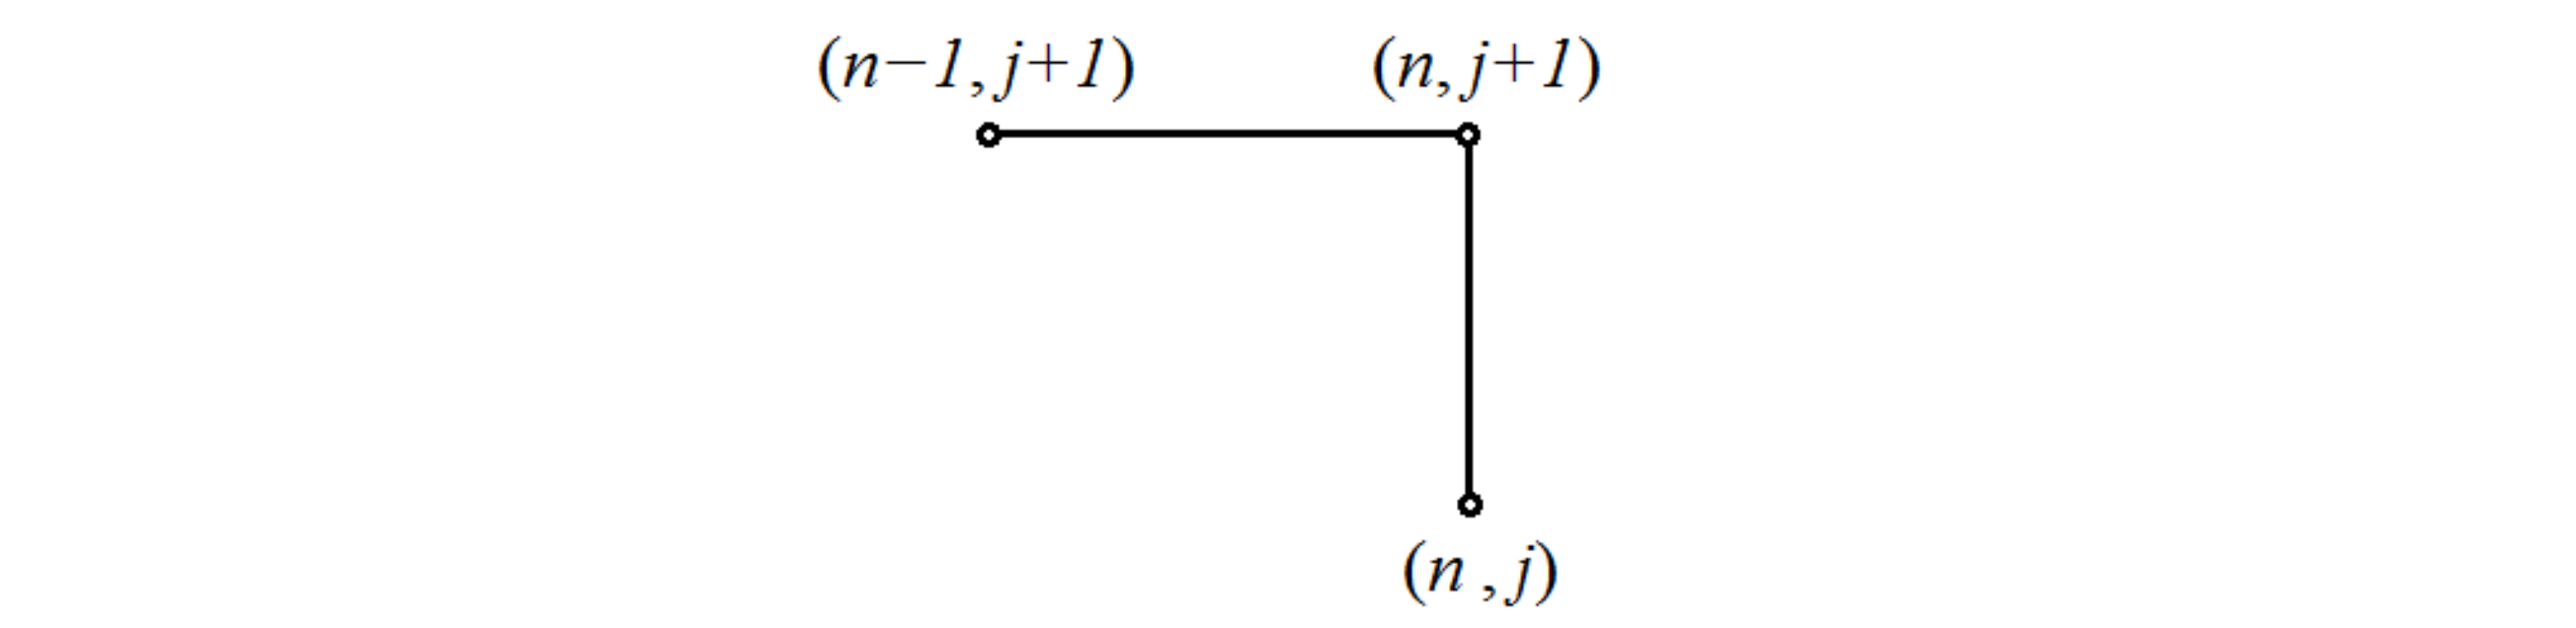

#### Схема "Квадрат"


Для рассматриваемой задачи будем использовать [четырехточечный шаблон](http://math.phys.msu.ru/data/374/tema5.pdf). Он безусловно устойчив и аппроксимирует задачу как $O({h}^2 + {\tau}^2)$.

Таким образом, разностная схема задачи имеет вид

$$
\frac{u_n^{m+1} - u_n^m + u_{n+1}^{m+1} - u_{n+1}^m}{2\tau} - \frac{F_{n+1}^{m+1} - F_n^{m+1} + F_{n+1}^m - F_n^m}{2h} = 0.
$$

При помощи метода Ньютона найдем корень этого уравнения - $u^{m+1}_{n+1}$ и перейдем к вычислению
следующей точки.

Используем начальное и граничное условия

$$
\left\{\begin{split}
u^0_n= n h\\
u^{m}_0 = 0
\end{split}\\
\right.
$$


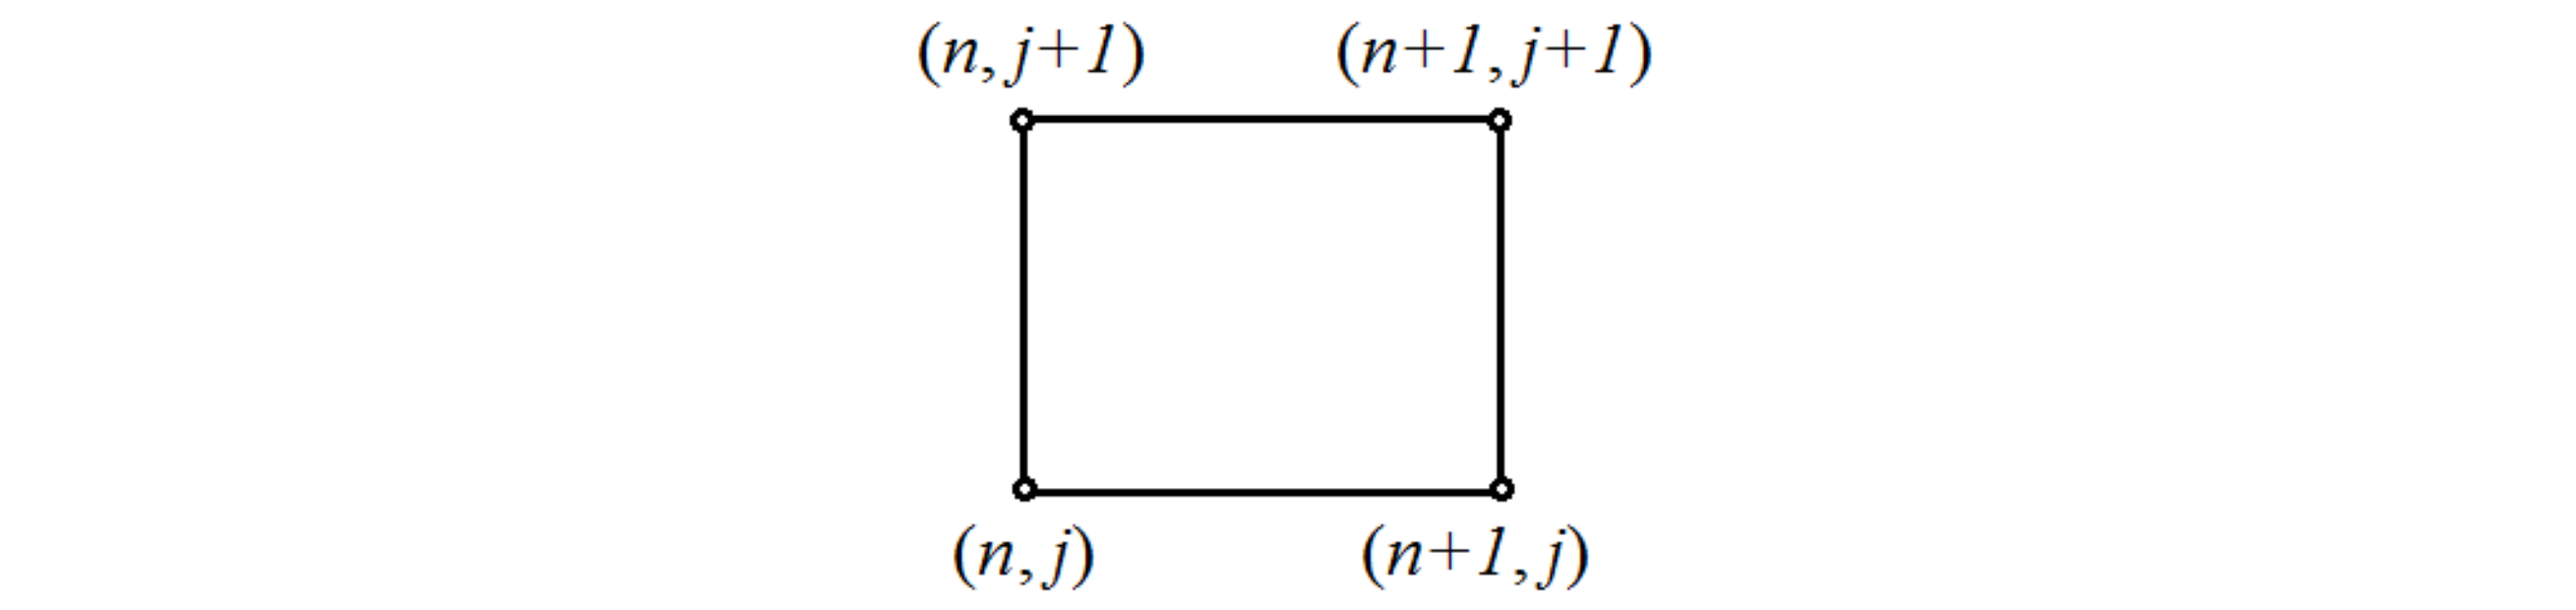

Уравнение данной схемы - это уравнение относительно $u_{n+1}^{m+1}$: $f\left(u_{n+1}^{m+1}\right) = 0$

Таким образом разностная аппроксимация уравнения в точке $(x_n+0,5h; t_m+0,5\tau)$ имеет следующий вид

$$
\left\{\begin{split}
f\left(u_{n+1}^{m+1}\right) = \frac{u_n^{m+1} - u_n^m + u_{n+1}^{m+1} - u_{n+1}^m}{2\tau} - \frac{F_{n+1}^{m+1} - F_n^{m+1} + F_{n+1}^m - F_n^m}{2h}\\
f'\left(u_{n+1}^{m+1}\right) = \frac{1}{2\tau} - \frac{1}{1+{u_{n+1}^{m+1}}^2}\cdot\frac{1}{2h}\\
u_n^0 = x_n\\
u_0^m = 0
\end{split}\\
\right. 
$$

Полученную разностную схему будем решать с помощью метода бегущего счета. Считая известными значения $t_m$ и последовательно вычисляя $y_1^{m+1},\ y_2^{m+1},\ ...,\ y_N^{m+1}$, найдем $t_{m+1}$. Корни уравнения для каждого $n$ будем искать методом Ньютона.

Суть метода Ньютона заключается в итерационной последовательности 
$$u_{n+1}^{m+1^{(s+1)}} = u_{n+1}^{m+1^{(s)}} - \frac{f\left(u_{n+1}^{m+1^{(s)}}\right)}{f'\left(u_{n+1}^{m+1^{(s)}}\right)},$$
которая продолжается до тех пор, пока не будет достигнута необходимая точность $\varepsilon$: $|u_{n+1}^{m+1^{(s+1)}} - u_{n+1}^{m+1^{(s)}}| \leq \varepsilon$.

## Обоснование математической модели

### Обоснование аппроксимации

Обозначим $C\left(u_n^m\right) = arctan(u)$. Тогда разностная схема примет следующий вид: 

$$
\frac{u_{n+1}^{m+1} - u_{n+1}^m}{2\tau} + C(u)\frac{u_{n+1}^{m+1} - u_{n}^{m+1}}{2h}+\frac{u_{n}^{m+1} - u_{n}^{m}}{2\tau} + C(u)\frac{u_{n+1}^{m} - u_{n}^{m}}{2h} = 0
$$

Разложим $u(x, y)$ по формуле Тейлора около центра ячейки $\left(x_n + \frac{h}{2}; t_m + \frac{\tau}{2}\right)$.

$$
u_{n+1}^{m} = u_{n+1/2}^m + \frac{h}{2}{y'}_{n+1/2}^m + \frac{h^2}{2\cdot4}{y''}_{n+1/2}^m + \frac{h^3}{6\cdot8}{y'''}_{n+1/2}^m + O(h^4)
$$
$$
u_{n}^{m} = u_{n+1/2}^m - \frac{h}{2}{y'}_{n+1/2}^m + \frac{h^2}{2\cdot4}{y''}_{n+1/2}^m - \frac{h^3}{6\cdot8}{y'''}_{n+1/2}^m + O(h^4)
$$


Тогда 
$$
\frac{u_{n+1}^{m} - u_{n}^{m}}{2h} = \frac{1}{2h}\left(h{y'}_{n+1/2}^m + \frac{h^3}{3\cdot8}{y'''}_{n+1/2}^m + O\left(h^4\right)\right) = {y'}_{n+1/2}^m + \frac{h^2}{3\cdot8}{y'''}_{n+1/2}^m + O(h^3) = {y'}_{n+1/2}^m + O\left(h^2\right)
$$

Аналогично для приращения по временному индексу.

$$
u_{n}^{m+1} = u_{n}^{m+1/2} + \frac{\tau}{2}{y'}_{n}^{m+1/2} + \frac{\tau^2}{2\cdot4}{y''}_{n}^{m+1/2} + \frac{\tau^3}{6\cdot8}{y'''}_{n}^{m+1/2} + O(\tau^4)
$$
$$
u_{n}^{m} = u_{n}^{m+1/2} - \frac{\tau}{2}{y'}_{n}^{m+1/2} + \frac{\tau^2}{2\cdot4}{y''}_{n}^{m+1/2} - \frac{\tau^3}{6\cdot8}{y'''}_{n}^{m+1/2} + O(\tau^4)
$$


Тогда 
$$
\frac{u_{n}^{m+1/2} - u_{n}^{m}}{2\tau} = \frac{1}{2\tau}\left(\tau{y'}_{n}^{m+1/2} + \frac{\tau^3}{3\cdot8}{y'''}_{n}^{m+1/2} + O\left(\tau^4\right)\right) = \\={y'}_{n}^{m+1/2} + \frac{\tau^2}{3\cdot8}{y'''}_{n}^{m+1/2} + O(\tau^3) = {y'}_{n}^{m+1/2} + O\left(\tau^2\right)
$$

Следовательно, аппроксимация в узле $\left(x_n + \frac{h}{2}; t_m + \frac{\tau}{2}\right)$ имеет порядок $O(\tau^2 + h^2)$.

### Обоснование устойчивости

####  Необходимое условие сходимости - спектральный критерий Неймана

Зафиксируем коэффициент перед $\frac{\partial u}{\partial x}$. Возьмём какую-нибудь произвольную точку $(x_0, t_0)$.
Тогда разностная схема будет иметь вид 

$$
\frac{u^{m+1}_n - u^m_{n} + u^{m+1}_{n+1} - u^m_{n+1}}{2\tau} + C(u)\frac{С u^{m+1}_{n+1} - u^{m+1}_{n} + u^{m}_{n+1} - u^{m}_{n}}{2h}=0
$$

Будем искать решение в виде $u^{m}_{n} = \lambda^m e^{i\alpha n}$. Подставляя, получаем:

$$
\lambda = \frac{C\tau\left(e^{i \alpha} - 1\right) - h \left(e^{i \alpha} + 1\right)}{C\tau\left(e^{i \alpha} - 1\right) + h \left(e^{i \alpha} + 1\right)}
$$

Из этого выражения видно, что условие $|\lambda(\alpha)|\leq1$ выполнено для любых значений шага по времени и координате, следовательно, спектральный критерий Неймана также выполнен для любых $\tau,\ h$. Поэтому данная схема безусловно устойчива.

#### Достаточное условие сходимости - критерий Куранта

Представим разностную схему в виде

$$
u_{n+1}^{m+1}\left(1-\frac{C\tau}{h}\right) + u_{n}^{m+1}\left(1+\frac{C\tau}{h}\right) = u_{n}^{m}\left(1-\frac{C\tau}{h}\right) + u_{n+1}^{m}\left(1+\frac{C\tau}{h}\right)
$$

Оценим это равенство по норме

$$
||u^{m+1}||\left(1-\frac{C\tau}{h}\right) + ||u^{m+1}||\left(1+\frac{C\tau}{h}\right) \leq 2||u^m||,
$$

$$
||u^{m+1}|| \leq ||u^m|| \leq ||u^{m-1}|| \leq ... \leq ||г^0|| = ||\varphi||.
$$

То есть критерий Куранта выполняется.

## Численный расчёт

Зададим: $\varepsilon$ - точность в методе Ньютона, $N$ - количество шагов по $x$, $М$ - количество шагов по $t$, а также границы нашей сетки. 

In [130]:
X_START = 0
X_END = 1
T_START = 0
T_END = 2
N = 50
M = 50
error = 0.001
i_max = 10000
        

x = np.linspace(X_START, X_END, N)
t = np.linspace(T_START, T_END, M)
dx = x[1] - x[0]
dt = t[1] - t[0]
            
u = np.empty((N, M))
        
for n in np.arange(N):
    u[0][n] = dx * n
for m in np.arange(M):
    u[m][0] = 0
        
def calculate_u(u):
    print('Calculating...')
    for n in range(1, N):
        clear_output(wait = True)
        print(f'Progress: {round(n/(N-1)*100)}%')
        for m in range(1, M):

            # Определение точек, на которых будет работать шаблон
            u11 = u[n-1][m-1]
            u21 = u[n][m-1]
            u12 = u[n-1][m]

            # Вычисление значения u в новой точке
            u_new = solve_newton(u21, u12, u11, i_max)
            u[n][m] = u_new
    print('Done!')

def solve_newton(u21, u12, u11, i_max):
    x = u11
    i = 0
    while np.abs(f(u12, u11, u21, x)) > error and i < i_max:
        x += (-f(u12, u11, u21, x) / f_div(x))
        i+=1
    return x

Конкретные функции

In [131]:
def C(u):
    return (1) / (1 + u ** 2)

def C_integral(u):
    return np.arctan(u)

def f(u12, u11, u21, u22):
    return 0.5*(u12 - u11 + u22 - u21) / dt + 0.5*(C_integral(u22) - C_integral(u12) + C_integral(u21) - C_integral(u11)) / dx

def f_div(u22):
    return 0.5 / dt + 0.5*(C(u22)) / dx 

### Вычислим значение функции u(x, t) во всех точках сетки.

In [132]:
calculate_u(u)

Progress: 100%
Done!


Визуализация решения

<IPython.core.display.Javascript object>


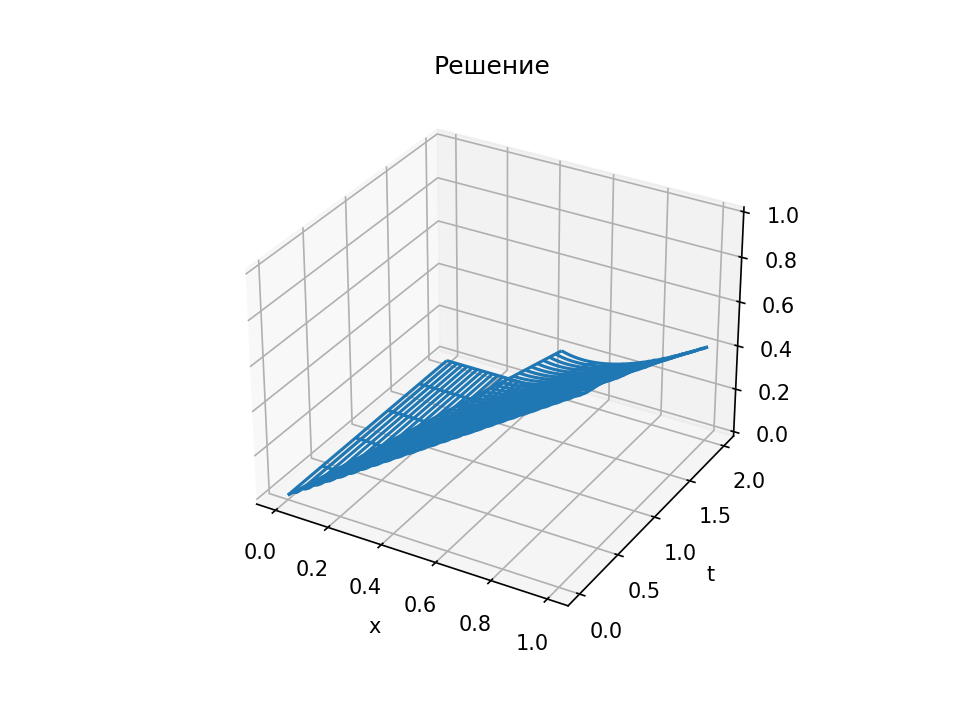

In [133]:
%matplotlib notebook

tm = np.linspace(T_start,T_end, num=M)
xn = np.linspace(X_start, X_end, num=N)

X, T = np.meshgrid(xn, tm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(X, T, u, rstride=10,cstride=1)
plt.title('Решение')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

<IPython.core.display.Javascript object>


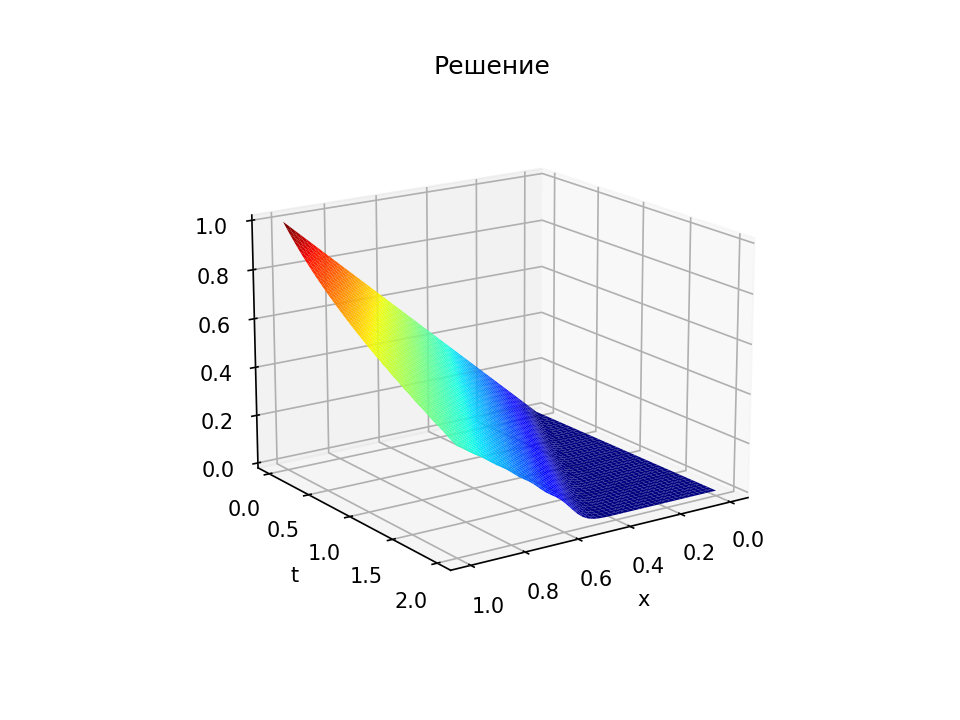

In [134]:
from mpl_toolkits.mplot3d import axes3d

xn = np.linspace(X_start, X_end, num = N)
tm = np.linspace(T_start, T_end, num = M)

X, T = np.meshgrid(xn, tm)

fig1 = plt.figure()
o1 = fig1.add_subplot(111, projection = '3d')
p1 = o1.plot_surface(X, T, u, rstride = 1, cstride = 1, cmap = 'jet')
o1.view_init(30, 90)
plt.title('Решение')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


Решение при фиксированном $t$

<IPython.core.display.Javascript object>


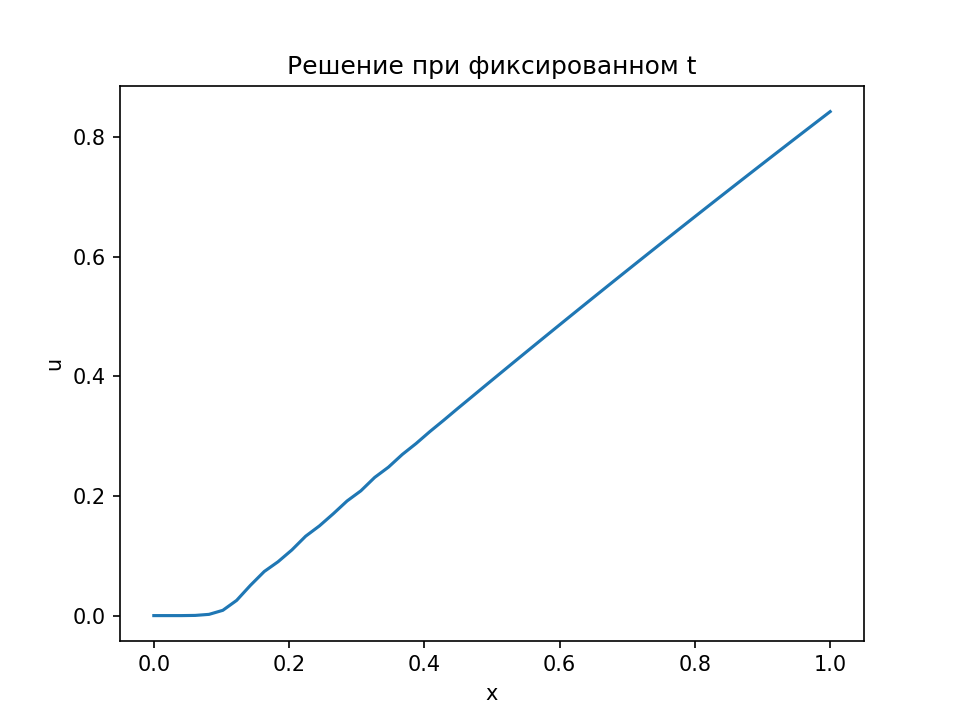

In [135]:
fig2 = plt.figure()
plt.plot(xn, u[9])
plt.title('Решение при фиксированном t')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

Сетка N = M = 10

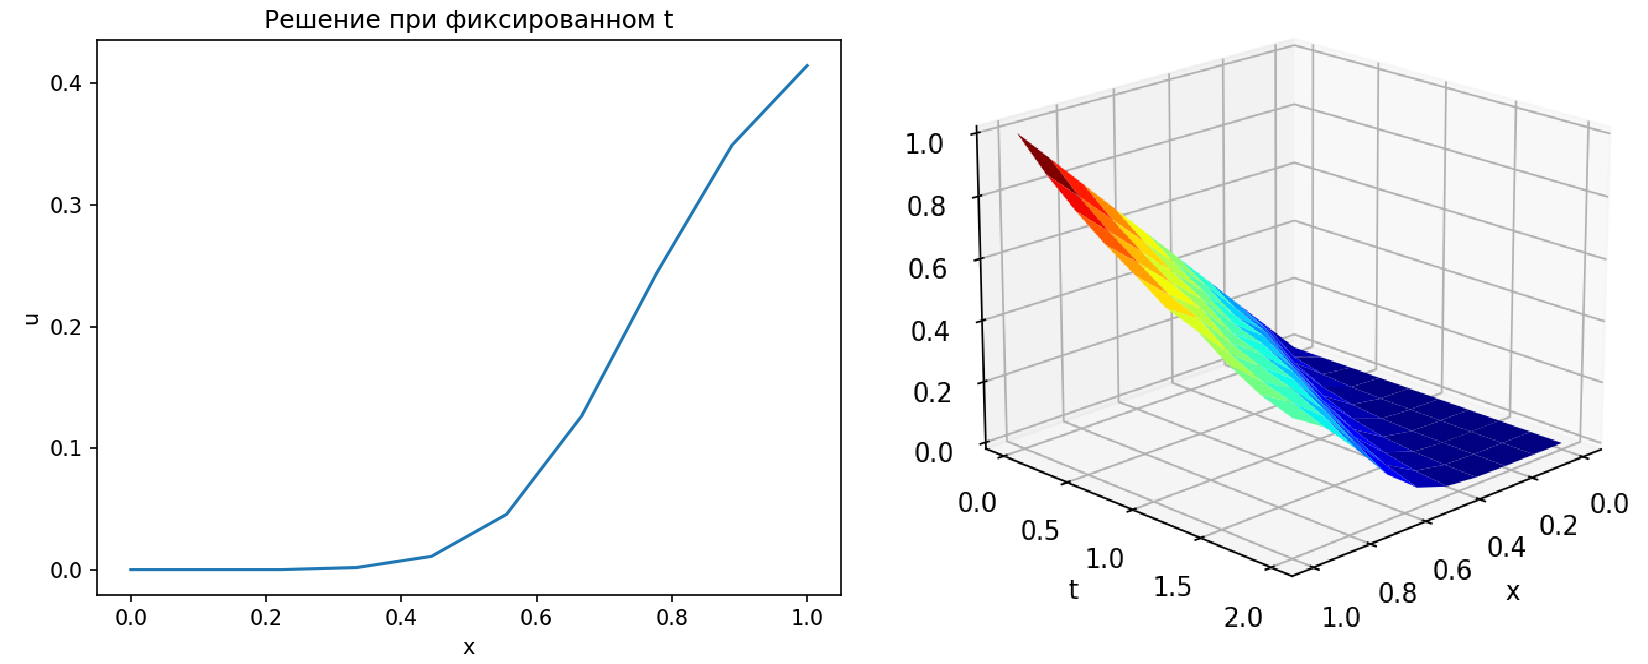

Сетка N = M = 30

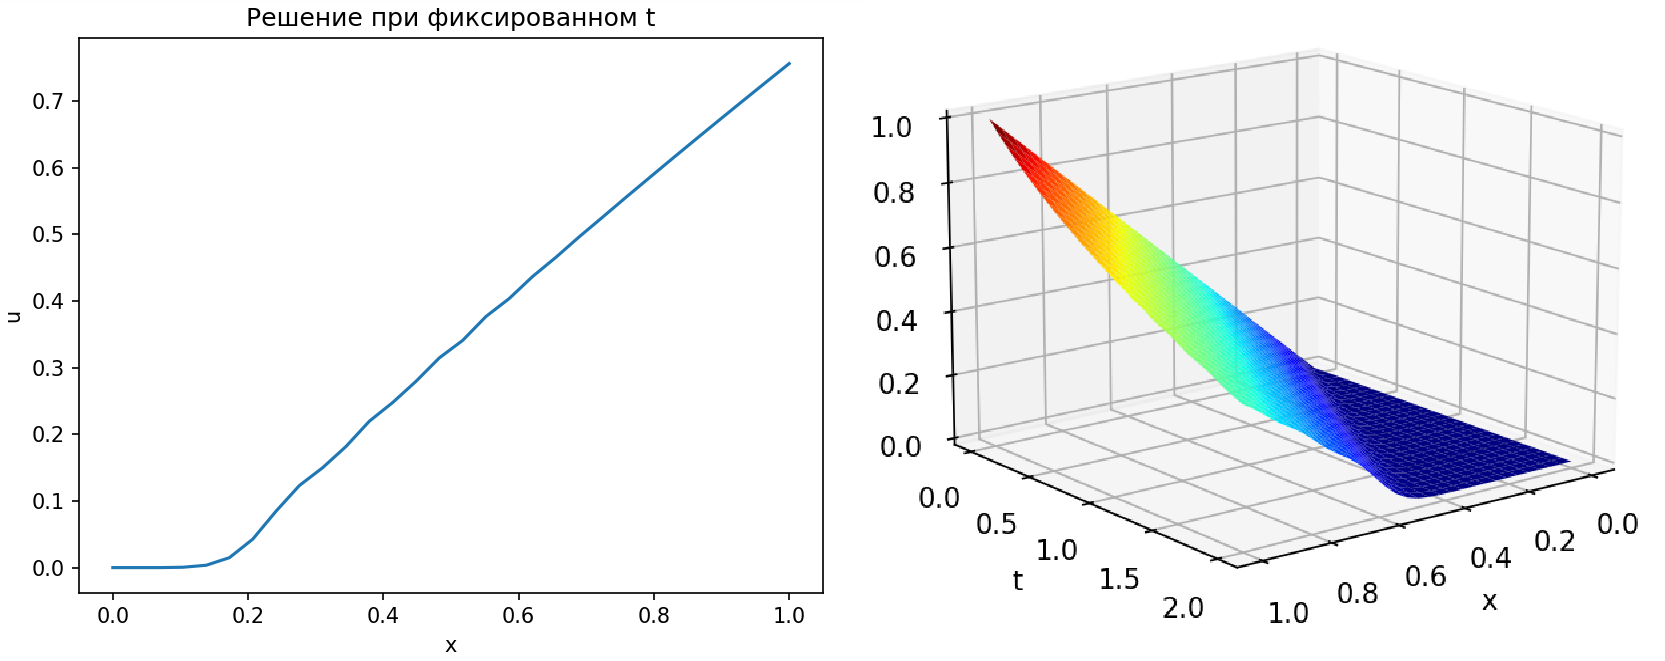

Сетка N = M = 50

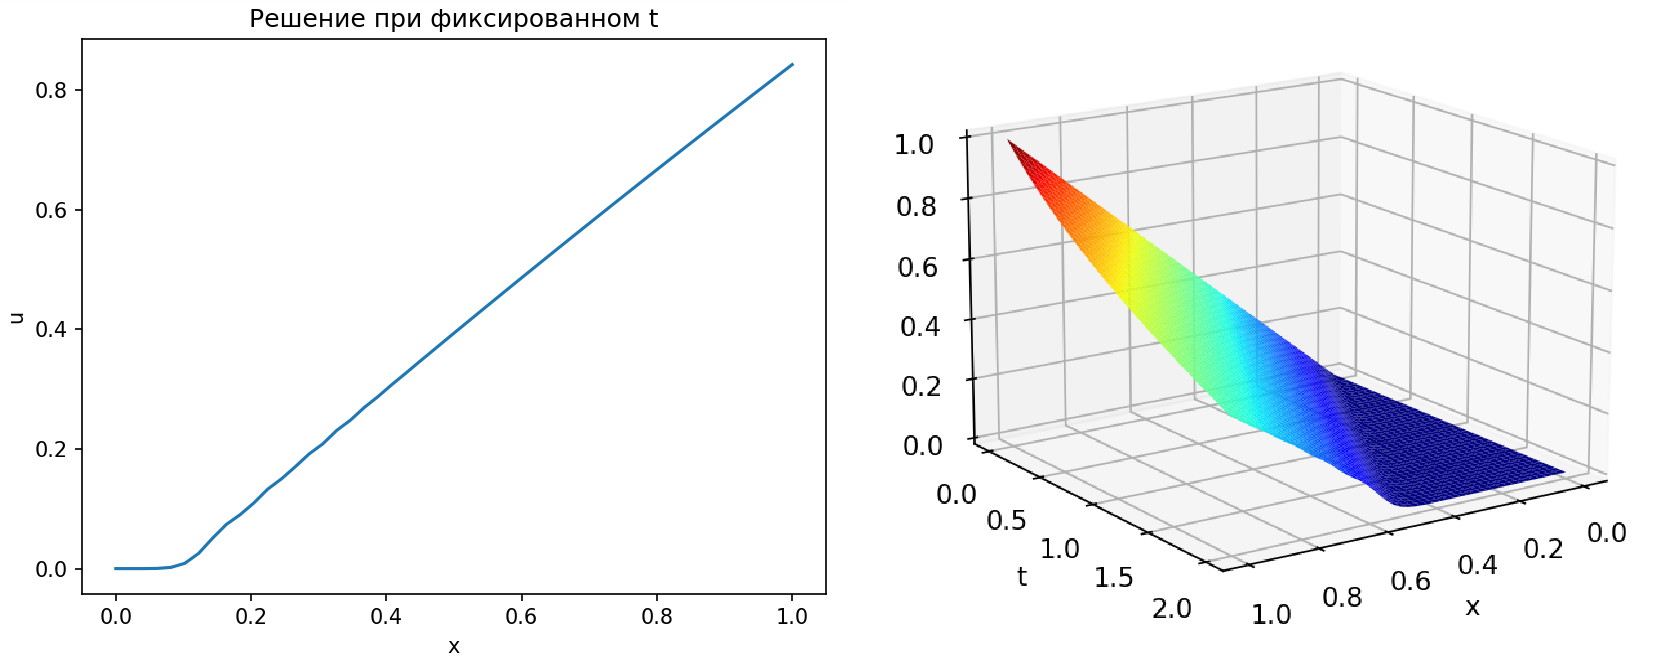